In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset into a pandas DataFrame
anime_df = pd.read_csv('anime.csv')

# Handle missing values
anime_df['genre'] = anime_df['genre'].fillna('Unknown')
anime_df['type'] = anime_df['type'].fillna('Unknown')

# Replace non-numeric values in 'episodes' column with NaN
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')

# Fill missing values in 'episodes' column with 0
anime_df['episodes'] = anime_df['episodes'].fillna(0)

# Fill missing values in 'rating' column with the mean rating
anime_df['rating'] = anime_df['rating'].fillna(anime_df['rating'].mean())

# Explore the dataset
print(anime_df.head())
print(anime_df.info())

# Feature Extraction
# Decide on features: genres, type, episodes, rating

# Convert categorical features into numerical representations
# For 'genre' and 'type', we can use one-hot encoding
anime_df = pd.get_dummies(anime_df, columns=['type'])
genres = anime_df['genre'].str.get_dummies(sep=',')
anime_df = pd.concat([anime_df, genres], axis=1)

# Normalize numerical features (episodes and rating) using StandardScaler
scaler = StandardScaler()
anime_df[['episodes', 'rating']] = scaler.fit_transform(anime_df[['episodes', 'rating']])

# Drop unnecessary columns
anime_df.drop(columns=['anime_id', 'name', 'genre'], inplace=True)

# Explore the processed dataset
print(anime_df.head())


   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie       1.0    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.25   
3                                   Sci-Fi, Thriller     TV      24.0    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  D

In [32]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def recommend_anime(anime_df, target_anime, threshold=0.5, top_n=10):
    # Remove rows with missing values
    anime_df_cleaned = anime_df.dropna()

    # Select only numeric columns for comparison
    numeric_df = anime_df_cleaned.select_dtypes(include=['float64', 'int64'])
    
    if target_anime not in anime_df_cleaned['name'].values:
        print(f"Anime '{target_anime}' not found in the dataset.")
        return []

    # Compute cosine similarity using only numeric columns
    target_row = numeric_df[anime_df_cleaned['name'] == target_anime].values.reshape(1, -1)
    cosine_sim = cosine_similarity(target_row, numeric_df.values)
    
    # Get indices of anime with similarity scores above the threshold
    similar_anime_indices = [idx for idx, sim_score in enumerate(cosine_sim[0]) if sim_score > threshold]
    
    # Exclude the target anime itself
    target_index = anime_df_cleaned[anime_df_cleaned['name'] == target_anime].index[0]
    similar_anime_indices.remove(target_index)
    
    # Sort indices based on similarity scores
    similar_anime_indices.sort(key=lambda x: cosine_sim[0][x], reverse=True)
    
    # Get top N similar anime
    recommended_anime = [anime_df_cleaned.iloc[idx]['name'] for idx in similar_anime_indices[:top_n]]
    
    return recommended_anime

# Example usage
target_anime = 'Death Note'  # Use the exact name as it appears in the dataset
recommended_anime = recommend_anime(anime_df, target_anime, threshold=0.5, top_n=10)
if recommended_anime:
    print("Recommended Anime:")
    for anime in recommended_anime:
        print(anime)


Recommended Anime:
Mushishi
Serial Experiments Lain
Kareshi Kanojo no Jijou
Kimi ga Nozomu Eien
Mobile Suit Gundam Seed Destiny
Aishiteruze Baby★★
Mobile Suit Gundam
Green Green
Hajime no Ippo
Tenjou Tenge


Evaluation

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(anime_df, test_size=0.2, random_state=42)

# Train the recommendation system (using the entire training set)
def train_recommendation_system(train_df):
    # No training is required for this simple recommendation system
    pass

# Evaluate the recommendation system
def evaluate_recommendation_system(test_df):
    # Initialize lists to store actual and predicted anime for each user
    actual_anime = []
    predicted_anime = []

    # Iterate over each row in the test set
    for _, row in test_df.iterrows():
        # Get the target anime for the current row
        target_anime = row['name']

        # Get the recommendations for the target anime
        recommendations = recommend_anime(train_df, target_anime, threshold=0.5, top_n=10)

        # Add the actual anime and recommended anime to the lists
        actual_anime.append(row['name'])
        predicted_anime.append(recommendations)

    # Flatten the list of predicted anime
    predicted_anime_flat = [anime for sublist in predicted_anime for anime in sublist]

    # Calculate precision, recall, and F1-score
    precision = precision_score(actual_anime, predicted_anime_flat, average='micro')
    recall = recall_score(actual_anime, predicted_anime_flat, average='micro')
    f1 = f1_score(actual_anime, predicted_anime_flat, average='micro')

    return precision, recall, f1

# Train the recommendation system
train_recommendation_system(train_df)

# Evaluate the recommendation system
precision, recall, f1 = evaluate_recommendation_system(test_df)

print("Evaluation Metrics:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Anime 'Suzy&#039;s Zoo: Daisuki! Witzy - Happy Birthday' not found in the dataset.
Anime 'Tactics' not found in the dataset.
Anime 'Kamen no Maid Guy' not found in the dataset.
Anime 'Take Your Way' not found in the dataset.
Anime 'Rinkaku' not found in the dataset.
Anime 'Suisei no Gargantia: Meguru Kouro, Haruka' not found in the dataset.
Anime 'Digital Devil Story: Megami Tensei' not found in the dataset.
Anime 'Chuunibyou demo Koi ga Shitai! Ren Lite' not found in the dataset.
Anime 'Kobo-chan' not found in the dataset.
Anime 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai' not found in the dataset.
Anime 'Mardock Scramble: The Second Combustion' not found in the dataset.
Anime 'Yukiguni no Oujisama' not found in the dataset.
Anime 'Mugen Senshi Valis' not found in the dataset.
Anime 'Cyborg 009: Call of Justice 1' not found in the dataset.
Anime 'Demi-chan wa Kataritai' not found in the dataset.
Anime 'Ane Koi: Suki Kirai Daisuki.' not found in the dataset.
Anime 'Chrome Shel

ValueError: Found input variables with inconsistent numbers of samples: [2459, 0]

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have already loaded and preprocessed the dataset
anime_df = pd.read_csv('anime.csv')

# Drop rows with missing values
anime_df.dropna(inplace=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(anime_df, test_size=0.2, random_state=42)

# Example recommendation model (replace this with your actual model)
def recommend():
    # Dummy recommendation: recommend the top-rated anime
    top_anime = train_data.sort_values(by='rating', ascending=False)[:10]['anime_id']
    return top_anime

# Evaluate the recommendation model using MSE
def evaluate_model(test_data):
    predictions = []
    actual_ratings = []
    for anime_id in test_data['anime_id']:
        recommended_anime = recommend()
        actual_rating = test_data[test_data['anime_id'] == anime_id]['rating'].values[0]
        predicted_rating = 5 if anime_id in recommended_anime else 0
        predictions.append(predicted_rating)
        actual_ratings.append(actual_rating)
    mse = mean_squared_error(actual_ratings, predictions)
    return mse

# Evaluate the model
mse_score = evaluate_model(test_data)
print("Mean Squared Error (MSE):", mse_score)


Mean Squared Error (MSE): 43.31955790349418


In [13]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
anime_df = pd.read_csv('anime.csv')

# Drop rows with missing values
anime_df.dropna(inplace=True)

# Example recommendation model (replace this with your actual model)
def recommend_top_n(test_data, n=10):
    # Get unique anime IDs from the test data
    unique_anime_ids = test_data['anime_id'].unique()
    # Recommend the top-rated anime from the test data
    top_anime = anime_df[anime_df['anime_id'].isin(unique_anime_ids)].sort_values(by='rating', ascending=False)[:n]['anime_id']
    return top_anime

# Evaluate the recommendation model using precision, recall, and F1-score
def evaluate_model(test_data, n=10):
    actual = test_data['anime_id'].values
    predicted = recommend_top_n(test_data, n)
    # Ensure both actual and predicted arrays have the same length
    actual_set = set(actual)
    predicted_set = set(predicted)
    # Calculate true positives
    true_positives = len(actual_set.intersection(predicted_set))
    # Calculate precision, recall, and F1-score
    precision = true_positives / len(predicted_set) if len(predicted_set) > 0 else 0
    recall = true_positives / len(actual_set) if len(actual_set) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1

# Split the data into training and testing sets (if necessary)
# train_data, test_data = train_test_split(anime_df, test_size=0.2, random_state=42)

# Evaluate the model
precision, recall, f1 = evaluate_model(anime_df, n=10)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 1.0
Recall: 0.0008321544478655238
F1-score: 0.0016629250852249107


In [16]:
import pandas as pd

# Load the dataset
anime_df = pd.read_csv('anime.csv')

# Drop rows with missing values
anime_df.dropna(inplace=True)

# Function to recommend top N anime based on ratings
def recommend_top_n(n=10):
    # Sort anime by rating in descending order and select top N
    top_anime = anime_df.sort_values(by='rating', ascending=False).head(n)
    return top_anime

# Example usage: Get top 10 recommendations
top_recommendations = recommend_top_n(10)
print("Top 10 Recommendations:")
print(top_recommendations)


Top 10 Recommendations:
       anime_id                                     name  \
10464     33662  Taka no Tsume 8: Yoshida-kun no X-Files   
10400     30120              Spoon-hime no Swing Kitchen   
9595      23005                         Mogura no Motoro   
0         32281                           Kimi no Na wa.   
9078      33607                             Kahei no Umi   
1          5114         Fullmetal Alchemist: Brotherhood   
10786     26313          Yakusoku: Africa Mizu to Midori   
2         28977                                 Gintama°   
3          9253                              Steins;Gate   
4          9969                            Gintama&#039;   

                                                   genre   type episodes  \
10464                                     Comedy, Parody  Movie        1   
10400                                    Adventure, Kids     TV  Unknown   
9595                                       Slice of Life  Movie        1   
0          

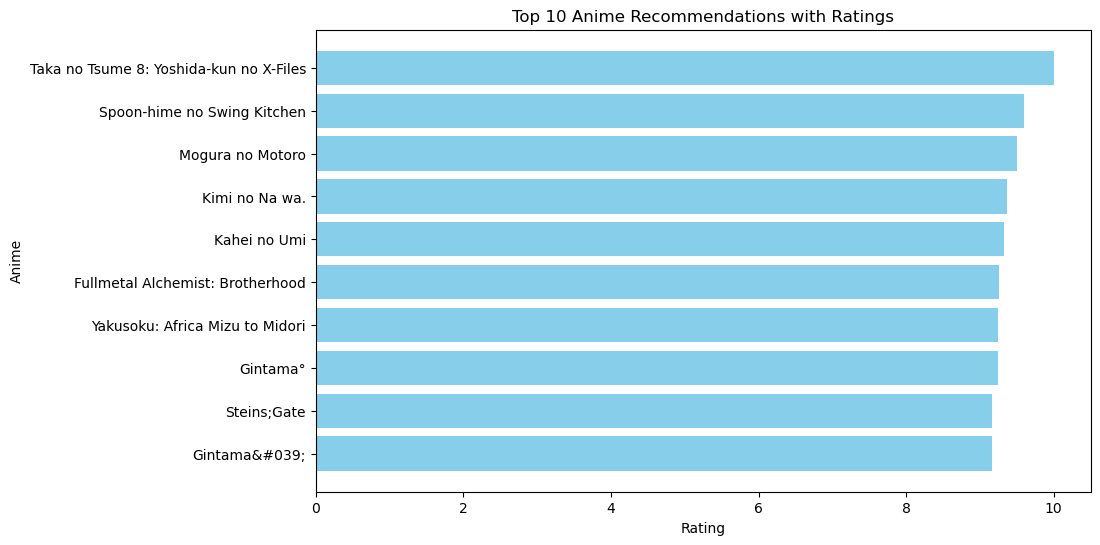

In [20]:
import matplotlib.pyplot as plt

# Extract the anime names and ratings
anime_names = top_recommendations['name']
ratings = top_recommendations['rating']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(anime_names, ratings, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Anime')
plt.title('Top 10 Anime Recommendations with Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to have highest rating on top
plt.show()
